In [56]:
import os
# numerical computing package
import numpy as np
# 
from scipy import stats
# command style functions that make matplotlib work like MATLAB
import matplotlib.pyplot as plt
# matplotlib
import matplotlib
# find nearest value
def find_nearest_index(array, value):
    return (np.abs(array - value)).argmin()
#
import sys
#
import pickle
#
import xarray as xr
#
from glob import glob as gb
#
import time
#
import cartopy.crs as ccrs

In [4]:
%%javascript
IPython.notebook.kernel.execute('nb_name = ' + '"' + IPython.notebook.notebook_name + '"')

<IPython.core.display.Javascript object>

In [5]:
!pwd

/home/561/erd561/wombat_jra-iaf_mom025


In [6]:
figures_path = '/home/561/erd561/figures/wombat_jra_mom025/'
script_name = nb_name[:-6]
print('Figures will be saved in: ' + figures_path + script_name + '\n')

remote_path1 = '/g/data/ua8/JRA55-do/v1-3/'

remote_path2 = '/g/data/v45/mtc599/mom5/dec16b/OUTPUTr1/'

Figures will be saved in: /home/561/erd561/figures/wombat_jra_mom025/c02_year_to_year_variability_ocean



In [7]:
%%time

from dask.distributed import Client
c = Client()
print(c)

<Client: scheduler='tcp://127.0.0.1:38227' processes=8 cores=8>
CPU times: user 627 ms, sys: 287 ms, total: 914 ms
Wall time: 4.11 s


In [8]:
# ice_daily, ice_month, ocean_bgc_2d, ocean_bgc_carbon, ocean_bgc_daily,
# ocean_bgc_npzd, ocean_cfc, ocean_force, ocean_global, ocean_month, ocean_surface
years = np.arange(1958, 2017)
print(years)
var1 = 'surface'
files1 = sorted(gb(remote_path2 + 'ocean_' + var1 + '*.nc'))
for f in files1:
    print(f)
print(len(files1))

var2 = 'force'
files2 = sorted(gb(remote_path2 + 'ocean_' + var2 + '*.nc'))
for f in files2:
    print(f)
print(len(files2))

[1958 1959 1960 1961 1962 1963 1964 1965 1966 1967 1968 1969 1970 1971
 1972 1973 1974 1975 1976 1977 1978 1979 1980 1981 1982 1983 1984 1985
 1986 1987 1988 1989 1990 1991 1992 1993 1994 1995 1996 1997 1998 1999
 2000 2001 2002 2003 2004 2005 2006 2007 2008 2009 2010 2011 2012 2013
 2014 2015 2016]
/g/data/v45/mtc599/mom5/dec16b/OUTPUTr1/ocean_surface_1958_01.nc
/g/data/v45/mtc599/mom5/dec16b/OUTPUTr1/ocean_surface_1959_01.nc
/g/data/v45/mtc599/mom5/dec16b/OUTPUTr1/ocean_surface_1960_01.nc
/g/data/v45/mtc599/mom5/dec16b/OUTPUTr1/ocean_surface_1961_01.nc
/g/data/v45/mtc599/mom5/dec16b/OUTPUTr1/ocean_surface_1962_01.nc
/g/data/v45/mtc599/mom5/dec16b/OUTPUTr1/ocean_surface_1963_01.nc
/g/data/v45/mtc599/mom5/dec16b/OUTPUTr1/ocean_surface_1964_01.nc
/g/data/v45/mtc599/mom5/dec16b/OUTPUTr1/ocean_surface_1965_01.nc
/g/data/v45/mtc599/mom5/dec16b/OUTPUTr1/ocean_surface_1966_01.nc
/g/data/v45/mtc599/mom5/dec16b/OUTPUTr1/ocean_surface_1967_01.nc
/g/data/v45/mtc599/mom5/dec16b/OUTPUTr1/ocean_sur

In [9]:
%%time

sst = []
taux = []
for f1, f2 in zip(files1, files2):
    
    if f1 == files1[0]:
        xt_ocean = \
            xr.open_dataset(f1).\
            xt_ocean.\
            sel(xt_ocean=slice(100-360,170-360))
        yt_ocean = \
            xr.open_dataset(f1).\
            yt_ocean.\
            sel(yt_ocean=slice(-70,-10))
        sst = \
            xr.open_dataset(f1).\
            temp.\
            sel(yt_ocean=slice(-70,-10), xt_ocean=slice(100-360,170-360)).\
            mean(dim='Time')
        print(str(f1) + ' OK')
        
        xu_ocean = \
            xr.open_dataset(f1).\
            xu_ocean.\
            sel(xu_ocean=slice(100-360,170-360))
        yu_ocean = \
            xr.open_dataset(f1).\
            yu_ocean.\
            sel(yu_ocean=slice(-70,-10))
        taux = \
            xr.open_dataset(f2).\
            tau_x.\
            sel(yu_ocean=slice(-70,-10), xu_ocean=slice(100-360,170-360)).\
            mean(dim='Time')
        print(str(f2) + ' OK')
            
    else:
        sst = \
            xr.concat([
                xr.open_dataset(f1).\
                temp.\
                sel(yt_ocean=slice(-70,-10), xt_ocean=slice(100-360,170-360)).\
                mean(dim='Time'),
                sst
            ], 'year'
            )
        print(str(f1) + ' OK')
        
        taux = \
            xr.concat([ 
                xr.open_dataset(f2).\
                tau_x.\
                sel(yu_ocean=slice(-70,-10), xu_ocean=slice(100-360,170-360)).\
                mean(dim='Time'),
                taux
            ], 'year'
            )
        print(str(f2) + ' OK')
    

print(sst.shape)
print(taux.shape)

/g/data/v45/mtc599/mom5/dec16b/OUTPUTr1/ocean_surface_1958_01.nc OK
/g/data/v45/mtc599/mom5/dec16b/OUTPUTr1/ocean_force_1958_01.nc OK
/g/data/v45/mtc599/mom5/dec16b/OUTPUTr1/ocean_surface_1959_01.nc OK
/g/data/v45/mtc599/mom5/dec16b/OUTPUTr1/ocean_force_1959_01.nc OK
/g/data/v45/mtc599/mom5/dec16b/OUTPUTr1/ocean_surface_1960_01.nc OK
/g/data/v45/mtc599/mom5/dec16b/OUTPUTr1/ocean_force_1960_01.nc OK
/g/data/v45/mtc599/mom5/dec16b/OUTPUTr1/ocean_surface_1961_01.nc OK
/g/data/v45/mtc599/mom5/dec16b/OUTPUTr1/ocean_force_1961_01.nc OK
/g/data/v45/mtc599/mom5/dec16b/OUTPUTr1/ocean_surface_1962_01.nc OK
/g/data/v45/mtc599/mom5/dec16b/OUTPUTr1/ocean_force_1962_01.nc OK
/g/data/v45/mtc599/mom5/dec16b/OUTPUTr1/ocean_surface_1963_01.nc OK
/g/data/v45/mtc599/mom5/dec16b/OUTPUTr1/ocean_force_1963_01.nc OK
/g/data/v45/mtc599/mom5/dec16b/OUTPUTr1/ocean_surface_1964_01.nc OK
/g/data/v45/mtc599/mom5/dec16b/OUTPUTr1/ocean_force_1964_01.nc OK
/g/data/v45/mtc599/mom5/dec16b/OUTPUTr1/ocean_surface_1965_01.

In [93]:
%%time

lon_GAB = [116, 146.5]
lat_GAB = [-42.5, -30]
    
sst_GAB_anom = \
    sst.\
    sel(yt_ocean=slice(lat_GAB[0],lat_GAB[1]), 
        xt_ocean=slice(lon_GAB[0]-360,lon_GAB[1]-360)).\
    mean(dim=('yt_ocean', 'xt_ocean')) - \
    sst.\
    sel(yt_ocean=slice(lat_GAB[0],lat_GAB[1]), 
        xt_ocean=slice(lon_GAB[0]-360,lon_GAB[1]-360)).\
    mean(dim=('yt_ocean', 'xt_ocean', 'year'))
print(str(f1) + ' OK')

taux_GAB_anom = \
    taux.\
    sel(yu_ocean=slice(lat_GAB[0],lat_GAB[1]), 
        xu_ocean=slice(lon_GAB[0]-360,lon_GAB[1]-360)).\
    mean(dim=('yu_ocean', 'xu_ocean')) - \
    taux.\
    sel(yu_ocean=slice(lat_GAB[0],lat_GAB[1]), 
        xu_ocean=slice(lon_GAB[0]-360,lon_GAB[1]-360)).\
    mean(dim=('yu_ocean', 'xu_ocean', 'year'))
print(str(f2) + ' OK')
            
print(sst_GAB_anom.shape)
print(sst_GAB_anom)
print(taux_GAB_anom.shape)
print(taux_GAB_anom)


lon_TS = [146.5, 155]
lat_TS = [-45, -35]
sst_TS_anom = \
    sst.\
    sel(yt_ocean=slice(lat_TS[0],lat_TS[1]), 
        xt_ocean=slice(lon_TS[0]-360,lon_TS[1]-360)).\
    mean(dim=('yt_ocean', 'xt_ocean')) - \
    sst.\
    sel(yt_ocean=slice(lat_TS[0],lat_TS[1]), 
        xt_ocean=slice(lon_TS[0]-360,lon_TS[1]-360)).\
    mean(dim=('yt_ocean', 'xt_ocean', 'year'))
print(str(f1) + ' OK')
taux_TS_anom = \
    taux.\
    sel(yu_ocean=slice(lat_TS[0],lat_TS[1]), 
        xu_ocean=slice(lon_TS[0]-360,lon_TS[1]-360)).\
    mean(dim=('yu_ocean', 'xu_ocean')) - \
    taux.\
    sel(yu_ocean=slice(lat_TS[0],lat_TS[1]), 
        xu_ocean=slice(lon_TS[0]-360,lon_TS[1]-360)).\
    mean(dim=('yu_ocean', 'xu_ocean', 'year'))
print(str(f2) + ' OK')       
print(sst_TS_anom.shape)
print(sst_TS_anom)
print(taux_TS_anom.shape)
print(taux_TS_anom)


lon_LC = [110, 116]
lat_LC = [-35, -20]
sst_LC_anom = \
    sst.\
    sel(yt_ocean=slice(lat_LC[0],lat_LC[1]), 
        xt_ocean=slice(lon_LC[0]-360,lon_LC[1]-360)).\
    mean(dim=('yt_ocean', 'xt_ocean')) - \
    sst.\
    sel(yt_ocean=slice(lat_LC[0],lat_LC[1]), 
        xt_ocean=slice(lon_LC[0]-360,lon_LC[1]-360)).\
    mean(dim=('yt_ocean', 'xt_ocean', 'year'))
print(str(f1) + ' OK')
taux_LC_anom = \
    taux.\
    sel(yu_ocean=slice(lat_LC[0],lat_LC[1]), 
        xu_ocean=slice(lon_LC[0]-360,lon_LC[1]-360)).\
    mean(dim=('yu_ocean', 'xu_ocean')) - \
    taux.\
    sel(yu_ocean=slice(lat_LC[0],lat_LC[1]), 
        xu_ocean=slice(lon_LC[0]-360,lon_LC[1]-360)).\
    mean(dim=('yu_ocean', 'xu_ocean', 'year'))
print(str(f2) + ' OK')       
print(sst_LC_anom.shape)
print(sst_LC_anom)
print(taux_LC_anom.shape)
print(taux_LC_anom)

/g/data/v45/mtc599/mom5/dec16b/OUTPUTr1/ocean_surface_1958_01.nc OK
/g/data/v45/mtc599/mom5/dec16b/OUTPUTr1/ocean_force_1958_01.nc OK
(59,)
<xarray.DataArray 'temp' (year: 59)>
array([-0.183978, -0.115582,  0.118774,  0.167086,  0.011963,  0.028521,
       -0.032614, -0.247108, -0.210326, -0.145582, -0.366089, -0.257478,
       -0.345881, -0.180921, -0.403802, -0.004987,  0.16169 ,  0.093355,
       -0.125806,  0.014195, -0.291199, -0.118182, -0.193419, -0.01551 ,
        0.227477,  0.05757 ,  0.037419,  0.039664,  0.029494, -0.57286 ,
       -0.474681, -0.038398, -0.116479,  0.066388, -0.260736, -0.253135,
       -0.174163,  0.026971,  0.238088,  0.140337,  0.475615,  0.224654,
        0.408834,  0.138068,  0.317319,  0.029045, -0.171155, -0.058259,
       -0.195615,  0.302181,  0.267665,  0.142879,  0.163578,  0.54384 ,
        0.481504,  0.667864, -0.269595,  0.37682 , -0.175165], dtype=float32)
Dimensions without coordinates: year
(59,)
<xarray.DataArray 'tau_x' (year: 59)>
array([

1958 OK
CPU times: user 7.2 s, sys: 3.41 s, total: 10.6 s
Wall time: 6.5 s


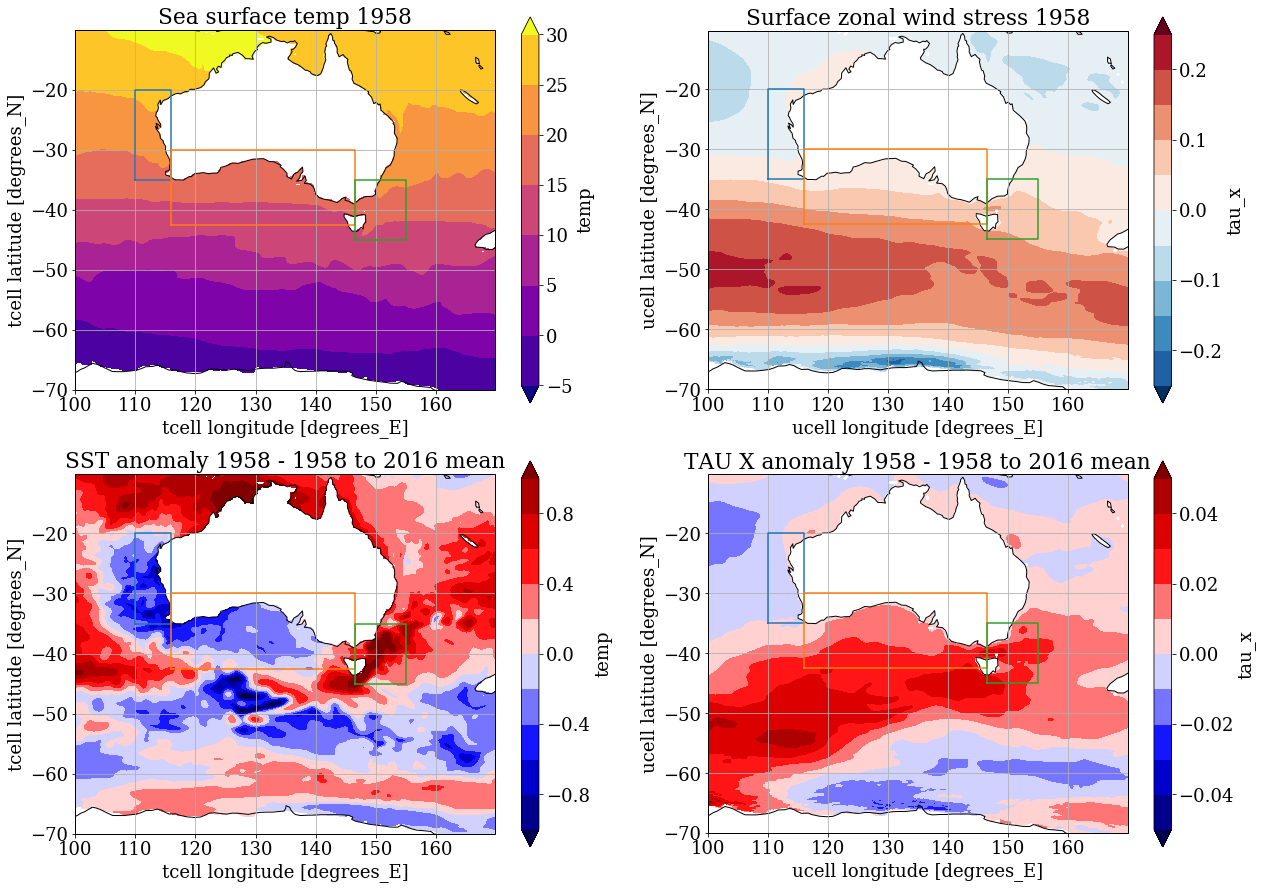

In [106]:
%%time

matplotlib.rcParams.update({'font.size': 18}) 
row = 2
col = 2
plt.rc('text', usetex=False)
plt.rc('font', family='serif')


for fid, (f1, f2) in enumerate(zip(files1[0:1], files2[0:1])):
    plt.close('all')
    fig = plt.figure() 
    fig.set_size_inches(18,14)

    ##
    ax = plt.subplot(row,col,1, projection=ccrs.PlateCarree())
    ax.coastlines()
    cmap = 'plasma'
    step = 5
    contf_lvls = np.arange(-5,30+1e-08,step) 
    sst[:,:,fid].plot.contourf(levels=contf_lvls, cmap=cmap, extend='both')
    plt.title('Sea surface temp ' + str(years[fid]))
    ax.set_xticks(np.arange(100,170,10), crs=ccrs.PlateCarree())
    ax.set_yticks(np.arange(-70,-10,10), crs=ccrs.PlateCarree())
    ax.grid()
    plt.plot(
        [lon_LC[0], lon_LC[1], lon_LC[1], lon_LC[0], lon_LC[0]],
        [lat_LC[0], lat_LC[0], lat_LC[1], lat_LC[1], lat_LC[0]])
    plt.plot(
        [lon_GAB[0], lon_GAB[1], lon_GAB[1], lon_GAB[0], lon_GAB[0]],
        [lat_GAB[0], lat_GAB[0], lat_GAB[1], lat_GAB[1], lat_GAB[0]])
    plt.plot(
        [lon_TS[0], lon_TS[1], lon_TS[1], lon_TS[0], lon_TS[0]],
        [lat_TS[0], lat_TS[0], lat_TS[1], lat_TS[1], lat_TS[0]])
    
    ax = plt.subplot(row,col,2, projection=ccrs.PlateCarree())
    ax.coastlines()
    cmap = 'RdBu_r'
    step = 0.05
    contf_lvls = np.arange(-0.25,0.25+1e-08,step)
    taux[:,:,fid].plot.contourf(levels=contf_lvls, cmap=cmap, extend='both')
    plt.title('Surface zonal wind stress ' + str(years[fid]))
    ax.set_xticks(np.arange(100,170,10), crs=ccrs.PlateCarree())
    ax.set_yticks(np.arange(-70,-10,10), crs=ccrs.PlateCarree())
    ax.grid()
    plt.plot(
        [lon_LC[0], lon_LC[1], lon_LC[1], lon_LC[0], lon_LC[0]],
        [lat_LC[0], lat_LC[0], lat_LC[1], lat_LC[1], lat_LC[0]])
    plt.plot(
        [lon_GAB[0], lon_GAB[1], lon_GAB[1], lon_GAB[0], lon_GAB[0]],
        [lat_GAB[0], lat_GAB[0], lat_GAB[1], lat_GAB[1], lat_GAB[0]])
    plt.plot(
        [lon_TS[0], lon_TS[1], lon_TS[1], lon_TS[0], lon_TS[0]],
        [lat_TS[0], lat_TS[0], lat_TS[1], lat_TS[1], lat_TS[0]])

    ##
    ax = plt.subplot(row,col,3, projection=ccrs.PlateCarree())
    ax.coastlines()
    cmap = 'seismic'
    step = 0.2
    contf_lvls = np.arange(-1,1+1e-08,step) 
    sst_anom = sst[:,:,fid] - sst.mean(dim='year')
    sst_anom.plot.contourf(levels=contf_lvls, cmap=cmap, extend='both')
    plt.title('SST anomaly ' + str(years[fid]) + ' - 1958 to 2016 mean')
    ax.set_xticks(np.arange(100,170,10), crs=ccrs.PlateCarree())
    ax.set_yticks(np.arange(-70,-10,10), crs=ccrs.PlateCarree())
    ax.grid()
    plt.plot(
        [lon_LC[0], lon_LC[1], lon_LC[1], lon_LC[0], lon_LC[0]],
        [lat_LC[0], lat_LC[0], lat_LC[1], lat_LC[1], lat_LC[0]])
    plt.plot(
        [lon_GAB[0], lon_GAB[1], lon_GAB[1], lon_GAB[0], lon_GAB[0]],
        [lat_GAB[0], lat_GAB[0], lat_GAB[1], lat_GAB[1], lat_GAB[0]])
    plt.plot(
        [lon_TS[0], lon_TS[1], lon_TS[1], lon_TS[0], lon_TS[0]],
        [lat_TS[0], lat_TS[0], lat_TS[1], lat_TS[1], lat_TS[0]])

    ax = plt.subplot(row,col,4, projection=ccrs.PlateCarree())
    ax.coastlines()
    cmap = 'seismic'
    step = 0.01
    contf_lvls = np.arange(-0.05,0.05+1e-08,step)
    taux_anom = taux[:,:,fid] - taux.mean(dim='year')
    taux_anom.plot.contourf(levels=contf_lvls, cmap=cmap, extend='both')
    plt.title('TAU X anomaly ' + str(years[fid]) + ' - 1958 to 2016 mean')
    ax.set_xticks(np.arange(100,170,10), crs=ccrs.PlateCarree())
    ax.set_yticks(np.arange(-70,-10,10), crs=ccrs.PlateCarree())
    ax.grid()
    plt.plot(
        [lon_LC[0], lon_LC[1], lon_LC[1], lon_LC[0], lon_LC[0]],
        [lat_LC[0], lat_LC[0], lat_LC[1], lat_LC[1], lat_LC[0]])
    plt.plot(
        [lon_GAB[0], lon_GAB[1], lon_GAB[1], lon_GAB[0], lon_GAB[0]],
        [lat_GAB[0], lat_GAB[0], lat_GAB[1], lat_GAB[1], lat_GAB[0]])
    plt.plot(
        [lon_TS[0], lon_TS[1], lon_TS[1], lon_TS[0], lon_TS[0]],
        [lat_TS[0], lat_TS[0], lat_TS[1], lat_TS[1], lat_TS[0]])

    fig.tight_layout(rect=[0, 0, 1, 0.90])

    output_ls = os.listdir(figures_path)
    if not script_name:
        script_name = 'test'
    elif script_name not in output_ls:
        os.mkdir(figures_path + '/' + script_name)
    plt.savefig(figures_path + '/' + script_name + '/' + script_name[0:3] \
                + '_fig1_' + str(years[fid]) + '.png', bbox_inches='tight', dpi=200)
    
    print(str(years[fid]) + ' OK')


1958 OK
CPU times: user 4.71 s, sys: 2.19 s, total: 6.9 s
Wall time: 4.24 s


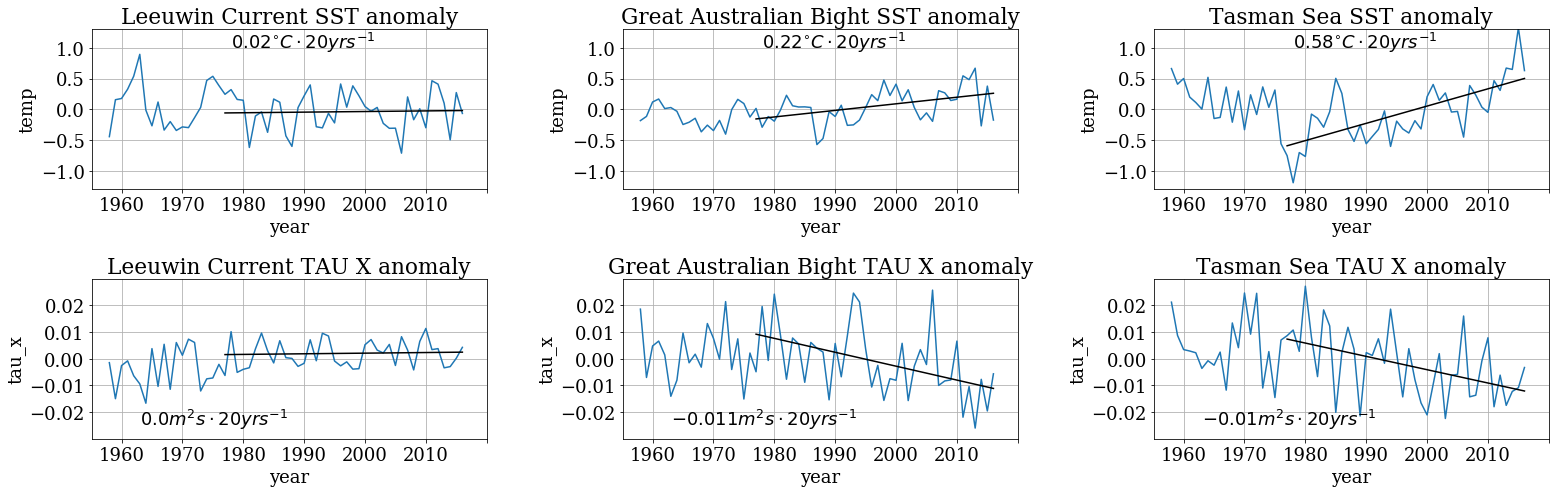

In [107]:
%%time

matplotlib.rcParams.update({'font.size': 18}) 
row = 2
col = 3
plt.rc('text', usetex=False)
plt.rc('font', family='serif')

plt.close('all')
fig = plt.figure() 
fig.set_size_inches(22,8)


##
ax = plt.subplot(row,col,1)
sst_LC_anom.plot()
plt.title('Leeuwin Current SST anomaly')
plt.ylim([-1.3, 1.3])
plt.yticks(np.arange(-1,1.5,0.5))
plt.xticks(np.arange(2,70,10), np.arange(1960,2020,10))
ax.grid()
slope, intercept, r_value, p_value, std_err = stats.linregress(years[20:], sst_LC_anom[20:])
plt.plot([19, 58], [1978*slope+intercept, 2016*slope+intercept], color='black')
plt.text(20, 1, '$' + str(np.round(slope*20,2)) + '^{\circ}C \cdot 20 yrs^{-1}$')

ax = plt.subplot(row,col,4)
taux_LC_anom.plot()
plt.title('Leeuwin Current TAU X anomaly')
plt.ylim([-0.03, 0.03])
plt.yticks(np.arange(-0.02,0.03,0.01))
plt.xticks(np.arange(2,70,10), np.arange(1960,2020,10))
ax.grid()
slope, intercept, r_value, p_value, std_err = stats.linregress(years[20:], taux_LC_anom[20:])
plt.plot([19, 58], [1978*slope+intercept, 2016*slope+intercept], color='black')
plt.text(5, -0.025, '$' + str(np.round(slope*20,3)) + 'm^{2} s \cdot 20 yrs^{-1}$')

##
ax = plt.subplot(row,col,2)
sst_GAB_anom.plot()
plt.title('Great Australian Bight SST anomaly')
plt.ylim([-1.3, 1.3])
plt.yticks(np.arange(-1,1.5,0.5))
plt.xticks(np.arange(2,70,10), np.arange(1960,2020,10))
ax.grid()
slope, intercept, r_value, p_value, std_err = stats.linregress(years[20:], sst_GAB_anom[20:])
plt.plot([19, 58], [1978*slope+intercept, 2016*slope+intercept], color='black')
plt.text(20, 1, '$' + str(np.round(slope*20,2)) + '^{\circ}C \cdot 20 yrs^{-1}$')


ax = plt.subplot(row,col,5)
taux_GAB_anom.plot()
plt.title('Great Australian Bight TAU X anomaly')
plt.ylim([-0.03, 0.03])
plt.yticks(np.arange(-0.02,0.03,0.01))
plt.xticks(np.arange(2,70,10), np.arange(1960,2020,10))
ax.grid()
slope, intercept, r_value, p_value, std_err = stats.linregress(years[20:], taux_GAB_anom[20:])
plt.plot([19, 58], [1978*slope+intercept, 2016*slope+intercept], color='black')
plt.text(5, -0.025, '$' + str(np.round(slope*20,3)) + 'm^{2} s \cdot 20 yrs^{-1}$')


##
ax = plt.subplot(row,col,3)
sst_TS_anom.plot()
plt.title('Tasman Sea SST anomaly')
plt.ylim([-1.3, 1.3])
plt.yticks(np.arange(-1,1.5,0.5))
plt.xticks(np.arange(2,70,10), np.arange(1960,2020,10))
ax.grid()
slope, intercept, r_value, p_value, std_err = stats.linregress(years[20:], sst_TS_anom[20:])
plt.plot([19, 58], [1978*slope+intercept, 2016*slope+intercept], color='black')
plt.text(20, 1, '$' + str(np.round(slope*20,2)) + '^{\circ}C \cdot 20 yrs^{-1}$')


ax = plt.subplot(row,col,6)
taux_TS_anom.plot()
plt.title('Tasman Sea TAU X anomaly')
plt.ylim([-0.03, 0.03])
plt.yticks(np.arange(-0.02,0.03,0.01))
plt.xticks(np.arange(2,70,10), np.arange(1960,2020,10))
ax.grid()
slope, intercept, r_value, p_value, std_err = stats.linregress(years[20:], taux_TS_anom[20:])
plt.plot([19, 58], [1978*slope+intercept, 2016*slope+intercept], color='black')
plt.text(5, -0.025, '$' + str(np.round(slope*20,3)) + 'm^{2} s \cdot 20 yrs^{-1}$')


fig.tight_layout(rect=[0, 0, 1, 0.90])

output_ls = os.listdir(figures_path)
if not script_name:
    script_name = 'test'
elif script_name not in output_ls:
    os.mkdir(figures_path + '/' + script_name)
plt.savefig(figures_path + '/' + script_name + '/' + script_name[0:3] \
            + '_fig2_.png', bbox_inches='tight', dpi=200)



TypeError: 'float' object is not callable

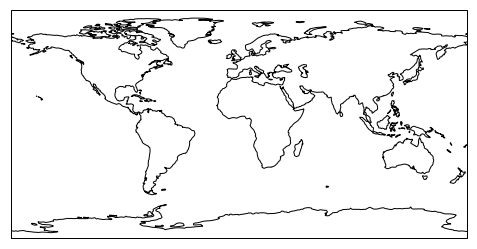

In [119]:
%%time

matplotlib.rcParams.update({'font.size': 18}) 
row = 1
col = 2
plt.rc('text', usetex=False)
plt.rc('font', family='serif')


plt.close('all')
fig = plt.figure() 
fig.set_size_inches(18,7)

##
ax = plt.subplot(row,col,1, projection=ccrs.PlateCarree())
ax.coastlines()
cmap = 'seismic'
step = 0.2
contf_lvls = np.arange(-1,1+1e-08,step)

# sst_trend = sst[:,:,-10:].mean(dim='year') - sst[:,:,20:30].mean(dim='year')


slope = np.nan(len(xt_ocean), len(yt_ocean))
print(slope)
intercept = np.nan(len(xt_ocean), len(yt_ocean))

r_value = np.nan(len(xt_ocean), len(yt_ocean))

p_value = np.nan(len(xt_ocean), len(yt_ocean))

std_err = np.nan(len(xt_ocean), len(yt_ocean))

for iid,i in enumerate(xt_ocean[1:0]):
    for jid,j in enumerate(yt_ocean):
        slope[iid,jid], \
        intercept[iid,jid], \
        r_value[iid,jid], \
        p_value[iid,jid], \
        std_err[iid,jid] = \
        stats.linregress(years, sst[iid,jid,:])

print(slope)


# sst_trend.plot.contourf(levels=contf_lvls, cmap=cmap, extend='both')
# plt.title('Sea surface temp ' + str(years[fid]))
# ax.set_xticks(np.arange(100,170,10), crs=ccrs.PlateCarree())
# ax.set_yticks(np.arange(-70,-10,10), crs=ccrs.PlateCarree())
# ax.grid()
# plt.plot(
#     [lon_LC[0], lon_LC[1], lon_LC[1], lon_LC[0], lon_LC[0]],
#     [lat_LC[0], lat_LC[0], lat_LC[1], lat_LC[1], lat_LC[0]])
# plt.plot(
#     [lon_GAB[0], lon_GAB[1], lon_GAB[1], lon_GAB[0], lon_GAB[0]],
#     [lat_GAB[0], lat_GAB[0], lat_GAB[1], lat_GAB[1], lat_GAB[0]])
# plt.plot(
#     [lon_TS[0], lon_TS[1], lon_TS[1], lon_TS[0], lon_TS[0]],
#     [lat_TS[0], lat_TS[0], lat_TS[1], lat_TS[1], lat_TS[0]])

# ax = plt.subplot(row,col,2, projection=ccrs.PlateCarree())
# ax.coastlines()
# cmap = 'RdBu_r'
# step = 0.05
# contf_lvls = np.arange(-0.25,0.25+1e-08,step)
# taux[:,:,fid].plot.contourf(levels=contf_lvls, cmap=cmap, extend='both')
# plt.title('Surface zonal wind stress ' + str(years[fid]))
# ax.set_xticks(np.arange(100,170,10), crs=ccrs.PlateCarree())
# ax.set_yticks(np.arange(-70,-10,10), crs=ccrs.PlateCarree())
# ax.grid()
# plt.plot(
#     [lon_LC[0], lon_LC[1], lon_LC[1], lon_LC[0], lon_LC[0]],
#     [lat_LC[0], lat_LC[0], lat_LC[1], lat_LC[1], lat_LC[0]])
# plt.plot(
#     [lon_GAB[0], lon_GAB[1], lon_GAB[1], lon_GAB[0], lon_GAB[0]],
#     [lat_GAB[0], lat_GAB[0], lat_GAB[1], lat_GAB[1], lat_GAB[0]])
# plt.plot(
#     [lon_TS[0], lon_TS[1], lon_TS[1], lon_TS[0], lon_TS[0]],
#     [lat_TS[0], lat_TS[0], lat_TS[1], lat_TS[1], lat_TS[0]])

# ##
# ax = plt.subplot(row,col,3, projection=ccrs.PlateCarree())
# ax.coastlines()
# cmap = 'seismic'
# step = 0.2
# contf_lvls = np.arange(-1,1+1e-08,step) 
# sst_anom = sst[:,:,fid] - sst.mean(dim='year')
# sst_anom.plot.contourf(levels=contf_lvls, cmap=cmap, extend='both')
# plt.title('SST anomaly ' + str(years[fid]) + ' - 1958 to 2016 mean')
# ax.set_xticks(np.arange(100,170,10), crs=ccrs.PlateCarree())
# ax.set_yticks(np.arange(-70,-10,10), crs=ccrs.PlateCarree())
# ax.grid()
# plt.plot(
#     [lon_LC[0], lon_LC[1], lon_LC[1], lon_LC[0], lon_LC[0]],
#     [lat_LC[0], lat_LC[0], lat_LC[1], lat_LC[1], lat_LC[0]])
# plt.plot(
#     [lon_GAB[0], lon_GAB[1], lon_GAB[1], lon_GAB[0], lon_GAB[0]],
#     [lat_GAB[0], lat_GAB[0], lat_GAB[1], lat_GAB[1], lat_GAB[0]])
# plt.plot(
#     [lon_TS[0], lon_TS[1], lon_TS[1], lon_TS[0], lon_TS[0]],
#     [lat_TS[0], lat_TS[0], lat_TS[1], lat_TS[1], lat_TS[0]])

# ax = plt.subplot(row,col,4, projection=ccrs.PlateCarree())
# ax.coastlines()
# cmap = 'seismic'
# step = 0.01
# contf_lvls = np.arange(-0.05,0.05+1e-08,step)
# taux_anom = taux[:,:,fid] - taux.mean(dim='year')
# taux_anom.plot.contourf(levels=contf_lvls, cmap=cmap, extend='both')
# plt.title('TAU X anomaly ' + str(years[fid]) + ' - 1958 to 2016 mean')
# ax.set_xticks(np.arange(100,170,10), crs=ccrs.PlateCarree())
# ax.set_yticks(np.arange(-70,-10,10), crs=ccrs.PlateCarree())
# ax.grid()
# plt.plot(
#     [lon_LC[0], lon_LC[1], lon_LC[1], lon_LC[0], lon_LC[0]],
#     [lat_LC[0], lat_LC[0], lat_LC[1], lat_LC[1], lat_LC[0]])
# plt.plot(
#     [lon_GAB[0], lon_GAB[1], lon_GAB[1], lon_GAB[0], lon_GAB[0]],
#     [lat_GAB[0], lat_GAB[0], lat_GAB[1], lat_GAB[1], lat_GAB[0]])
# plt.plot(
#     [lon_TS[0], lon_TS[1], lon_TS[1], lon_TS[0], lon_TS[0]],
#     [lat_TS[0], lat_TS[0], lat_TS[1], lat_TS[1], lat_TS[0]])

# fig.tight_layout(rect=[0, 0, 1, 0.90])

# output_ls = os.listdir(figures_path)
# if not script_name:
#     script_name = 'test'
# elif script_name not in output_ls:
#     os.mkdir(figures_path + '/' + script_name)
# plt.savefig(figures_path + '/' + script_name + '/' + script_name[0:3] \
#             + '_fig3_' + str(years[fid]) + '.png', bbox_inches='tight', dpi=200)

print(str(years[fid]) + ' OK')